# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 2. Методы нахождения оценок. Бутстреп. Байесовская статистика
### Мягкий дедлайн --- 27 октября 23:59
### Жёсткий дедлайн --- 2 ноября 16:59

Выполняйте задания прямо в ноутбуке. Пожалуйста, не стирайте условия задач.

- Информация о выполнении и курсе в целом есть в чате https://t.me/+IHdLycZDD5g5MDQy.
- По вопросам об условиях задач, требованиям можно писать в чат или https://t.me/vitalii_kondratiuk .
- По организационным вопросам https://t.me/d_pavlov_p

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* собственно кодом,
* Перед ячейками с кодом в случае необходимости пишите, что Вы вычисляете, что ожидаете увидеть и как будете анализировать результат
* После каждого числа или графика пишите анализ: каков результат? Оправдал ли он ожидания? Какие особености Вы увидели? Откуда они взялись?
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Для красоты графиков можно (и приветствуется) вместо гистограммы использовать ядерную оценку плотности (kernel density estimator): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Загрузим необходимый для задачи 2 датасет. Если что-то пошло не так, то просто скачайте файл по ссылке вручную.

In [137]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /content/Weibull.csv
100% 17.9k/17.9k [00:00<00:00, 23.2MB/s]


In [138]:
import pandas as pd
import numpy as np
from scipy import stats as sps
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

**Условие задания**: Великая Ордалия уже почти готова к путешествию, однако враги империи проникли в замок и уничтожили все формулы с оценками из Домашнего задания 1. Можно попытаться восстановить их по памяти, но не лучше ли взамен старых оценок изобрести новые? Помимо этого за две тысячи лет (прошедших с момента первой ордалии до наших дней) точечные оценки значительно устарели и уже не способны отражать реальную суть вещей, поэтому Вам будет предложено попробовать на практике два других подхода: интервальные оценки и байесовские оценки.

В этой практике Вам предложено реализовать несколько подходов к построению оценок и понять, когда какой подход применять.

**Дисклеймер**:
В задачах будет разбиение на пункты, но оцениваться задача будет **целиком**. Можете считать, что выполнение всех пунктов вместе с отсутствием замечаний по полноте анализа/эффективности кода/информативности графиков/т.д. приносит полный балл.

### Задача 1

Прочитайте ещё раз задачу 1 домашки 1. Вы сравнивали оценки исходя из визуальных свойств их графиков. Пришло время начать сравнивать оценки строго!

Напомним, что в задаче речь шла про оценки параметра $\theta$ распределения $U[0, \theta]$: $2\overline{X}$, $\frac{n+1}{n} X_{(n)}$, $(n+1)X_{(1)}$, $\overline{X} + X_{(n)}/ 2$ и $X_{(1)}+X_{(n)}$. Как и ранее, зафиксируем какое-то конкретное значение параметра, скажем, $\theta = 1$.

Постройте плотности для первых трёх оценок. Настойчиво просим предоставлять решение в виде теха, но если у вас лапки, то можете прикрепить фото с хорошо разборчивым почерком.

Решение и ответ:
см. pdf

Для квадратичной функции потерь посчитайте аналитически (для первых трёх оценок) и численно (для каждой оценки) риск для выборки из $N$ элементов. Начните с $N=1000$ и уменьшите его, если вычисления будут неподъемными. Для численного вычисления интеграла можно использовать scipy.integrate.quad или метод Монте-Карло.

In [139]:
N = 1000

скорпирую код с построением оценок из предыдущей моей домашки:

In [140]:
N = int(N)
theta = 2
estimates = []
X = sps.uniform.rvs(loc=0, scale=2, size=(N, N))

def cummean(X):
  return X.cumsum(axis=-1) / (np.arange(X.shape[-1]) + 1)

def cummin(X):
  return np.minimum.accumulate(X, axis=-1)

def cummax(X):
  return np.maximum.accumulate(X, axis=-1)

def estimation_1_1(X):
  return 2 * cummean(X)

def estimation_1_2(X):
  return cummean(X) + cummax(X) / 2

def estimation_1_3(X):
  n = np.arange(X.shape[-1]) + 1
  return n * cummin(X)

def estimation_1_4(X):
  return cummin(X) + cummax(X)

def estimation_1_5(X):
  n = np.arange(X.shape[-1]) + 1
  return (n + 1) / n * cummax(X)

mean_estimations = pd.DataFrame({
    'method': ['estimation_1_1', 'estimation_1_2', 'estimation_1_3', 'estimation_1_4', 'estimation_1_5'],
    'mean_estimation': [None] * 5
})

for index, estimation_f in enumerate([estimation_1_1, estimation_1_2, estimation_1_3, estimation_1_4, estimation_1_5]):
    estimation = estimation_f(X)
    mean_value = estimation.mean()
    mean_estimations.iloc[index, 1] = mean_value

print(mean_estimations)

           method mean_estimation
0  estimation_1_1        2.001427
1  estimation_1_2        1.994368
2  estimation_1_3        1.984415
3  estimation_1_4        2.000253
4  estimation_1_5        2.000272


введем функции для подсчета эмпирического риска и теоретического для каждой из оценок

In [141]:
def Risk(estimation, parametr):
  return ((estimation - parametr) ** 2).mean(axis=-1)

def risk1(theta, n):
    return theta**2 / (3 * n)

def risk2(theta, n):
    return ((n**2 + 9*n + 2) * theta**2) / (12 * n * (n + 1) * (n + 2))

def risk3(theta, n):
    return (n / (n - 2)) * theta**2

def risk4(theta, n):
    return (2 * n * theta**2) / ((n + 1)**2 * (n + 2))

def risk5(theta, n):
    return (theta**2) / (n * (n + 2))

In [142]:
risk_em = [{}, {}, {}, {}, {}]
risk_th = [{}, {}, {}, {}, {}]
i = 0
print(type(estimation_1_1))
for theta in [1, 1.2, 1.5, 1.8, 2]:
  X = sps.uniform.rvs(loc=0, scale=theta, size=(N, N))

  for index, (estimation_f, risk_f) in enumerate(zip(
      [estimation_1_1, estimation_1_2, estimation_1_3, estimation_1_4, estimation_1_5],
      [risk1, risk2, risk3, risk4, risk5])):
    estimation = estimation_f(X)[:,-1]
    risk_em[index][theta] = Risk(estimation, theta)
    risk_th[index][theta] = risk_f(theta, N)
    # print(type(estimation))
    i += 1
# i
# print(type(risk_em))
# print(type(risk_em[0]))
print(risk_em[0])

# print(type(risk_th[1][1]))
min = 10
min_theta = 0
min_est = 0
for index in range(0,5):
  print(f'Estimation: {index+1}')
  for theta in risk_th[index]:
    error = abs(risk_th[index][theta] - risk_em[index][theta]) / risk_th[index][theta]
    if error < min:
      min = error
      min_theta = theta
      min_est = index+1
    print(f'Theta = {theta} \tRisk_th = {risk_th[index][theta]:.6f} \tRisk_em = {risk_em[index][theta]:.6f} \terror = {error:.6f}')
  print('------------------------------')

print(f'{min:.6f}', "for est. number", min_est, " and theta= ", min_theta)

<class 'function'>
{1: 0.0003385428907525565, 1.2: 0.00047445695587898713, 1.5: 0.0007865723236637605, 1.8: 0.0010271649135088143, 2: 0.0012887727315568976}
Estimation: 1
Theta = 1 	Risk_th = 0.000333 	Risk_em = 0.000339 	error = 0.015629
Theta = 1.2 	Risk_th = 0.000480 	Risk_em = 0.000474 	error = 0.011548
Theta = 1.5 	Risk_th = 0.000750 	Risk_em = 0.000787 	error = 0.048763
Theta = 1.8 	Risk_th = 0.001080 	Risk_em = 0.001027 	error = 0.048921
Theta = 2 	Risk_th = 0.001333 	Risk_em = 0.001289 	error = 0.033420
------------------------------
Estimation: 2
Theta = 1 	Risk_th = 0.000084 	Risk_em = 0.000086 	error = 0.023668
Theta = 1.2 	Risk_th = 0.000121 	Risk_em = 0.000120 	error = 0.003683
Theta = 1.5 	Risk_th = 0.000189 	Risk_em = 0.000199 	error = 0.054834
Theta = 1.8 	Risk_th = 0.000272 	Risk_em = 0.000258 	error = 0.048502
Theta = 2 	Risk_th = 0.000335 	Risk_em = 0.000325 	error = 0.030341
------------------------------
Estimation: 3
Theta = 1 	Risk_th = 1.002004 	Risk_em = 0.9601

Постройте распределения оценок для одного $\theta$ на одном графике

In [143]:
theta = 2
X = sps.uniform.rvs(loc=0, scale=theta, size=(N, N))
estimations = []
for estimation_f in [estimation_1_1, estimation_1_2, estimation_1_3, estimation_1_4, estimation_1_5]:
    estimation = estimation_f(X)[:, -1]
    estimations.append(estimation)
    print(f'{len(estimations)}: mean: {np.mean(estimation)}, min: {np.min(estimation)}, max: {np.max(estimation)}, delta: {np.max(estimation) -np.min(estimation)}')


1: mean: 2.0007843243335883, min: 1.8628289640435332, max: 2.1156934373096465, delta: 0.2528644732661134
2: mean: 1.9994581639832831, min: 1.931102713799875, max: 2.0553576016652775, delta: 0.1242548878654024
3: mean: 2.032725060106413, min: 0.0011719559576128802, max: 13.131074569145529, delta: 13.129902613187916
4: mean: 2.0001647286930844, min: 1.9882095425403656, max: 2.0127309692330275, delta: 0.024521426692661885
5: mean: 2.0001301356366104, min: 1.9887271078983413, max: 2.0019985817031842, delta: 0.013271473804842948


видно, что оценка 3 странно себя ведет. да, у нее нормальное среднее (конечно, ведь она должна быть около теты, которая равна двум), но разброс равен delta=max-min=12, а у остальных оценок этот параметр будет меньше. намного меньше. видим, что в среднем дельта равна 0.1. Таким образом я построю два графика: один только с оценкой номер 3, а второй для всех остальных оценок чтобы не было проблем с масштабами

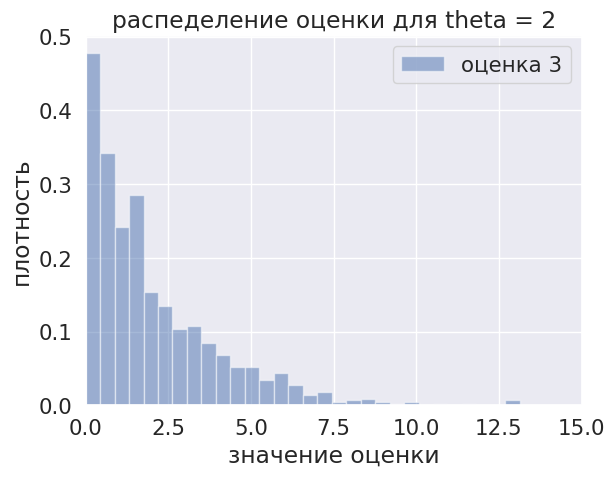

In [144]:
plt.hist(estimations[2], bins=30, alpha=0.5, label=f'оценка {3}', density=True)

plt.title("распеделение оценки для theta = 2")
plt.xlabel("значение оценки")
plt.ylabel("плотность")
plt.xlim(0, 15)
plt.legend()
plt.show()

In [145]:
del estimations[2]

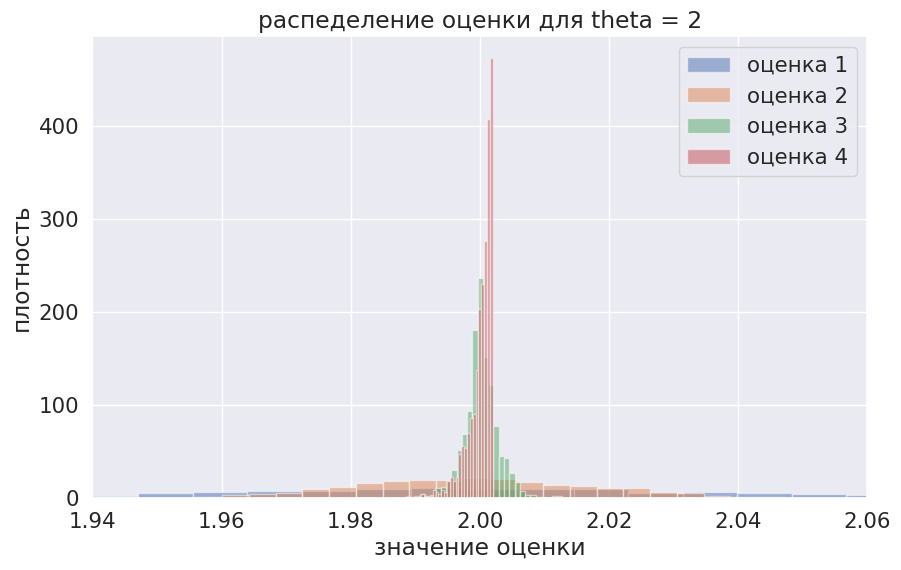

In [146]:
plt.figure(figsize=(10, 6))
for i, estimation in enumerate(estimations):
    plt.hist(estimation, bins=30, alpha=0.5, label=f'оценка {i+1}', density=True)

plt.title("распеделение оценки для theta = 2")
plt.xlabel("значение оценки")
plt.ylabel("плотность")
plt.xlim(1.94, 2.06)
plt.legend()
plt.show()

Вспомните свой вывод из задачи 1. Согласуется ли выбор "лучшей" оценки с понятием квадратичного риска? Почему?

Ответ: я считал, что лучшими являются оценки 4 и 5:  $X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$, аргументировав это тем, что они имеют наименьшую дисперсию и минимальное среднее отклонение от значения тета. В данном эксперименте мы вычислили функции риска для всех оценок и увидели, что мало того, что у оценок 4 и 5 они минимальны в теоретическом случае, так еще и на практике они являются минимальными. Да, из-за того, что эмпирическая и теоретическая функции риска имеют один порядок для каждой из оценок, то ошибки везде +- одинаковые, но в ячейке с подсчетом рисков я вывел строку, в которой наблюдается минимальная ошибка. Она как раз-таки соответствует оценке номер 4.

СОгласуясь с теорией, лучшей оценкой в равномерном подходе является оценка, при которой достигается минимальная функция риска при любом значении тета. В нашей же таблице мы видим, что сравнивая теоретические функции риска, оценка 4 является лучшей, но если мы перейдем к эмпирическим функциям, то

Вспомните и напишите формулировку теоремы Рао-Крамера. Посчитайте, какую нижнюю оценку риска предлагает эта теорема. Сравните её численное значение с посчитанным Вами риском. Сделайте выводы.


Ответ:
см. pdf

Численно посчитайте риск для функции потерь $l(x, y) = |x - y|$ и для какой-то другой осмысленной предложенной Вами функцией потерь. Будет ли порядок качества на оценках таким же, как и для квадратичного подхода?

In [147]:
theta_1 = estimation_1_1(X)[:, -1]
theta_2 = estimation_1_2(X)[:, -1]
theta_3 = estimation_1_3(X)[:, -1]

mae1 = np.mean(np.abs(theta_1 - theta))
mae2 = np.mean(np.abs(theta_2 - theta))
mae3 = np.mean(np.abs(theta_3 - theta))

print(f"Оценка 1: {mae1}")
print(f"Оценка 2: {mae2}")
print(f"Оценка 3: {mae3}")

Оценка 1: 0.030029819577411406
Оценка 2: 0.015102268117563579
Оценка 3: 1.5100198541963514


видим, что оценки 1 и 2 при таком подходе почти одинаковы. третья же оценка хуже почти в два раза

In [148]:
log_loss_risk_1 = np.mean(np.log(1 + np.abs(theta_1 - theta)))
log_loss_risk_2 = np.mean(np.log(1 + np.abs(theta_2 - theta)))
log_loss_risk_3 = np.mean(np.log(1 + np.abs(theta_3 - theta)))

print(f"Риск для логарифмической функции потерь:")
print(f"Оценка 1: {log_loss_risk_1}")
print(f"Оценка 2: {log_loss_risk_2}")
print(f"Оценка 3: {log_loss_risk_3}")


Риск для логарифмической функции потерь:
Оценка 1: 0.02935342709228823
Оценка 2: 0.014928179640955282
Оценка 3: 0.8227417708876797


тут я решил рассмотреть логарифмическую функцию потерь, которая вычисляется по формуле $l = ln(1+|x-y|)$. Оценки 1 и 2 тоже имеют схожие риски и оценка 3 снова проиграла

Вернёмся к вадратичной функции потерь. Пусть теперь сам параметр $\theta$ приходит из распределения $\mathsf Q$ с плотностью $q(x) = xI[0, 1]$. Посчитайте численно байесовский риск каждой оценки. Сравните оценки в байесовском подходе. Остался ли порядок прежним?

Подберите такую плотность на $\theta$, при котором порядок сравнения может измениться или объясните, почему это невозможно. Если Вы подобрали плотности, приведите пример постановки задачи, при которой Ваша плотность имеет практический смысл.

*Указание:* не пытайтесь обогнать оценку-максимум по качеству, но может другие две оценки можно заставить сравниваться по-разному для разных плотностей.

Сделайте вывод о сравнении оценок и теореме Рао-Крамера

если оценка достигает равенства в теореме Р-К то она называется эффективной. Нас в данной задаче интересуют оценки с наименьшим эмпирическим риском.

## Задача 2

Имперские банки каждую ночь подсчитывают баланс ресурсов Ордалии по сравнению с вчерашней ночью. За день приходят как новые ресурсы, так и потребляются уже имеющиеся. Как и у любого другого банка, если обозначить $X^1$ – максимальное значение баланса за день, $X^2$ – значение баланса в полночь, то $X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В файле Weibull.csv находятся соответствующие измерения.

Наша задача состоит в том, чтобы оценить параметр формы.

Формальное условие: для распределения Вейбулла, функция распределения которого предложена выше, предлагается найти оценку параметра $\gamma$.

In [149]:
weibull_sample = np.loadtxt("Weibull.csv")

1. Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна.

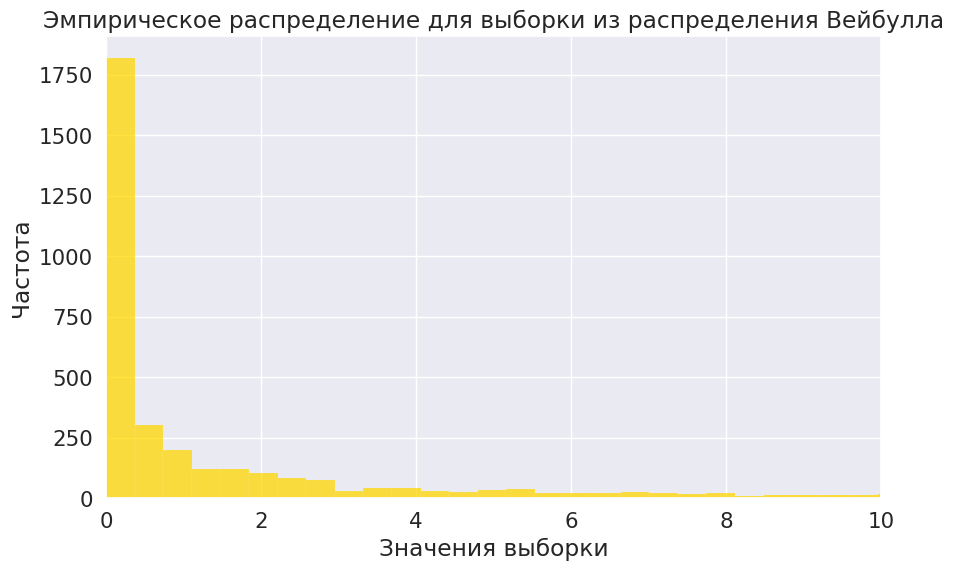

In [150]:
plt.figure(figsize=(10, 6))
sns.histplot(weibull_sample, bins=1000, color='gold')
plt.xlabel('Значения выборки')
plt.ylabel('Частота')
plt.title('Эмпирическое распределение для выборки из распределения Вейбулла')
plt.xlim(np.min(weibull_sample), 10)
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам придумать решение этой проблемы и обосновать его применимость. Ситуация, когда статистическая модель не описывает какие-то артефакты в данных (как, например, нули в этой задаче) для практики типична, и с ней приходится что-то делать.

Ответьте на два вопроса:

а. Могут ли нули появляться если честно семплировать из распределения Вейбулла?

нет, не могут, ведь в точке х=0, плотность распределения равна нулю, как и во всех точках  х<0. это значит, что вероятность получить точку 0 равна нулю

б. Зная плотность распределения и то, что компьютерная точность неабсолютна, откуда нули всё-таки взялись, учитывая то, что авторы задания сэмплировали выборку из распределения Вейбулла?

можно предположить, что такое произошло в связи с округлением чисел типа float или других чисел, с которыми работал автор нашего датасета, ведь любое число имеет ограниченную точность и поэтому числа типа 0.00...01 могли быть просто представлены компьютером как 0

Ответ:

2. Посчитайте эмпирическую функцию распределения и
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки.

 см. pdf

я придумал два способа борьбы с нулями у распределения. первый - просто удалить все нули. второй - заменить 0 на минимальное возможное число для типа с которым мы работаем (float64). это np.finfo(np.float64).eps. Проверив размеры массивов до и после удаления нулей я заметил, что выборка оскуднела с 3600 чисел до 3100. Как будто это плохо. Поэтому будем предпочтительно работать с заменой 0 на возможный минимум

In [151]:
print(len(weibull_sample))
print(weibull_sample.min())
print(weibull_sample.mean())
print("----------------------------------")
weibull_sample_norm = np.where(weibull_sample == 0, np.finfo(np.float64).eps, weibull_sample)
print(len(weibull_sample_norm))
print(weibull_sample_norm.min())
print(weibull_sample_norm.mean())


3652
0.0
4.866508762322015
----------------------------------
3652
2.220446049250313e-16
4.866508762322015


вроде норм: и размер выборки сохранили, и среднее по выборке вообще не изменилось

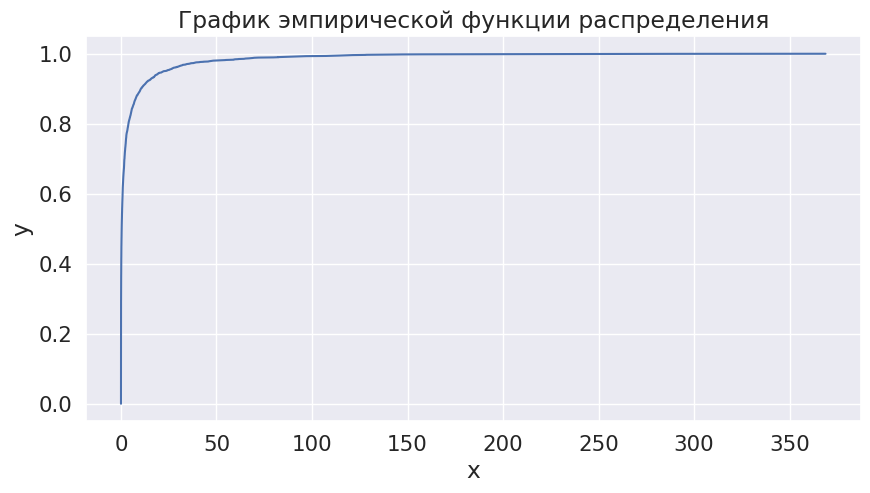

In [152]:
weibull_sample_norm = np.sort(weibull_sample_norm)
weibull_sample_norm_y = np.linspace(0, 1, len(weibull_sample_norm), endpoint=False)
ecdf_map = {x: y for x, y in zip(weibull_sample_norm, weibull_sample_norm_y)}
ecdf = np.array([ecdf_map[x] for x in weibull_sample_norm])
plt.figure(figsize=(10, 5))
plt.plot(weibull_sample_norm, weibull_sample_norm_y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("График эмпирической функции распределения")
plt.show()
x_new = np.log(weibull_sample_norm)
y_new = np.log(-np.log(1 - ecdf))

глядя на график, по тому, что он достаточно гладкий, можно сделать вывод, что наша выборка не имеет каких-то выбросов

**Постройте** график (`plt.scatter`) от (y', x') для Ваших способов борьбы с нулями разными цветами.
Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

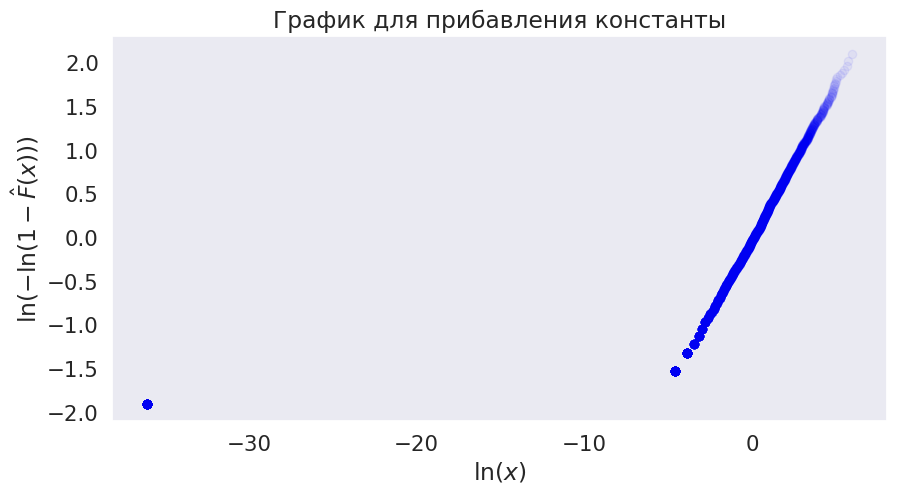

3145
0.01


In [153]:
plt.figure(figsize=(10, 5))
plt.scatter(x_new, y_new, color='blue', alpha=0.05)
plt.xlabel("$\ln(x)$")
plt.ylabel(r"$\ln(-\ln(1 - \hat{F}(x)))$")
plt.title("График для прибавления константы")
plt.grid()
plt.show()
weibull_sample_without_zeros = weibull_sample[weibull_sample != 0]
print(len(weibull_sample_without_zeros))
print(weibull_sample_without_zeros.min())

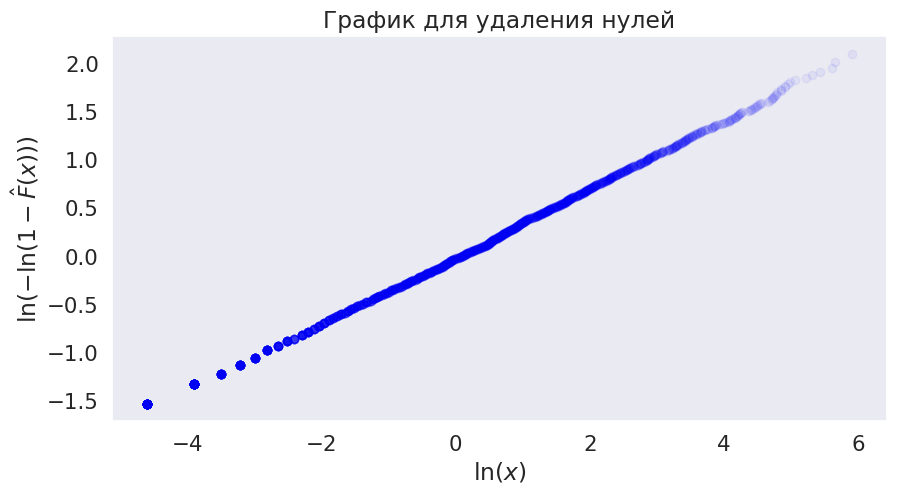

In [154]:
weibull_sample_without_zeros = weibull_sample[weibull_sample != 0]
weibull_sample_without_zeros = np.sort(weibull_sample_without_zeros)
weibull_sample_norm_y2 = np.linspace(0, 1, len(weibull_sample_without_zeros), endpoint=False)
ecdf_map2 = {x: y for x, y in zip(weibull_sample_without_zeros, weibull_sample_norm_y2)}
ecdf2 = np.array([ecdf_map[x] for x in weibull_sample_without_zeros])
x_new2 = np.log(weibull_sample_without_zeros)
y_new2 = np.log(-np.log(1 - ecdf2))
plt.figure(figsize=(10, 5))
plt.scatter(x_new2, y_new2, color='blue', alpha=0.05)
plt.xlabel("$\ln(x)$")
plt.ylabel(r"$\ln(-\ln(1 - \hat{F}(x)))$")
plt.title("График для удаления нулей")
plt.grid()
plt.show()

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод:**

глядя на последние два графика, можно сделать вывод, что удаление нулей - лучший вариант для модификации нашей выборки. единственное побочное действие - незначительное искривление по краям нашей прямой. График же для прибавления константы выглядит очень странно и имеет одну выраженную точку с абсциссой примерно -40. Предположу, что это как раз наши минимальные эпсилоны (их много, из-за чего эта точка даже с параметром alpha = 0.05 выглядит внушительно и то, что в этой точке логарифм очень мал)

3. Оцените параметр формы методом максимального правдоподобия
* по
первым 4 годам;
* по всей выборке.

Мы предполагаем, что Вы будете производить максимизацию по сетке --- для некоторого множества возможных параметров постройте сетку с некоторым шагом (для определённости возьмите шаг равный $10^{-3}$) и выберите лучший параметр на этой сетке. Известно, что $\log_{10}\gamma \in [-2, 2].$

Однако, если Вы хорошо поняли курс оптимизации, то можете написать оптимизатор, который находит максимум сам. Задачу можно переформулировать, чтобы ответ не изменился, а оптимизация шла быстрее. За хорошо сформулированную оптимизационную задачу и реализацию мы добавим 5 бонусных баллов.

Решение:

In [155]:
weibull_sample_norm = weibull_sample[weibull_sample != 0]

n_days = 4*365
first_4_years_sample = weibull_sample_norm[:n_days]
full_sample = weibull_sample_norm

gamma_values = np.logspace(-2, 2, 1000)
def log_likelihood(gamma, data):
    return np.sum(np.log(gamma) + (gamma - 1) * np.log(data) - data ** gamma)

log_likelihoods_4_years = [log_likelihood(g, first_4_years_sample) for g in gamma_values]
gamma_optimal_4_years = gamma_values[np.argmax(log_likelihoods_4_years)]

log_likelihoods_full_sample = [log_likelihood(g, full_sample) for g in gamma_values]
gamma_optimal_full_sample = gamma_values[np.argmax(log_likelihoods_full_sample)]

print("Оптимальное значение параметра gamma для первых 4 лет:", gamma_optimal_4_years)
print("Оптимальное значение параметра gamma для всей выборки:", gamma_optimal_full_sample)


Оптимальное значение параметра gamma для первых 4 лет: 0.4145888496832911
Оптимальное значение параметра gamma для всей выборки: 0.41078408899656466


два полученных числа отличаются, но несильно. отсюда можно предположить, что в первых 365*4 значениях выборки содержится какая-то значимая информация и нет странных выбросов

Найдите в библиотеке `scipy.stats` класс, отвечающий за данное семейство распределений (будьте аккуратны, внимательно читайте документацию!), и изучите его метод `fit`. Как он находит оценку параметра? Примените эту функцию к нашим данным и сравните полученные результаты с результатами выше.

*Замечание.* Обратите внимание, для чего именно сей метод находит оценку? Сделайте так, чтобы он возвращал оценку непосредственно для интересующего нас параметра.

In [156]:
from scipy.stats import weibull_min

params = weibull_min.fit(weibull_sample, floc=0)
gamma_estimate_scipy_1 = params[0]
print("Оценка через фит с фиксацией:", gamma_estimate_scipy_1)

params = weibull_min.fit(weibull_sample)
gamma_estimate_scipy_2 = params[0]
print("Оценка через фит без фиксации на 0 :", gamma_estimate_scipy_2)

Оценка через фит с фиксацией: 0.37239254594661236
Оценка через фит без фиксации на 0 : 0.6301663530360048


я попробовал поиграть с параметром floc, который, согласно интернету, отвечает смещению нашего распределения. При установке его в 0, я предполагаю, что большая часть выборки находится около нуля. Если же вообще не указывать его, то необходимое смещение выберется само. Но пока можно лишь заметить, что при фиксации на ноль оценка получилась более похожей на те, что были найдены в предыдущем пункте

4. Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

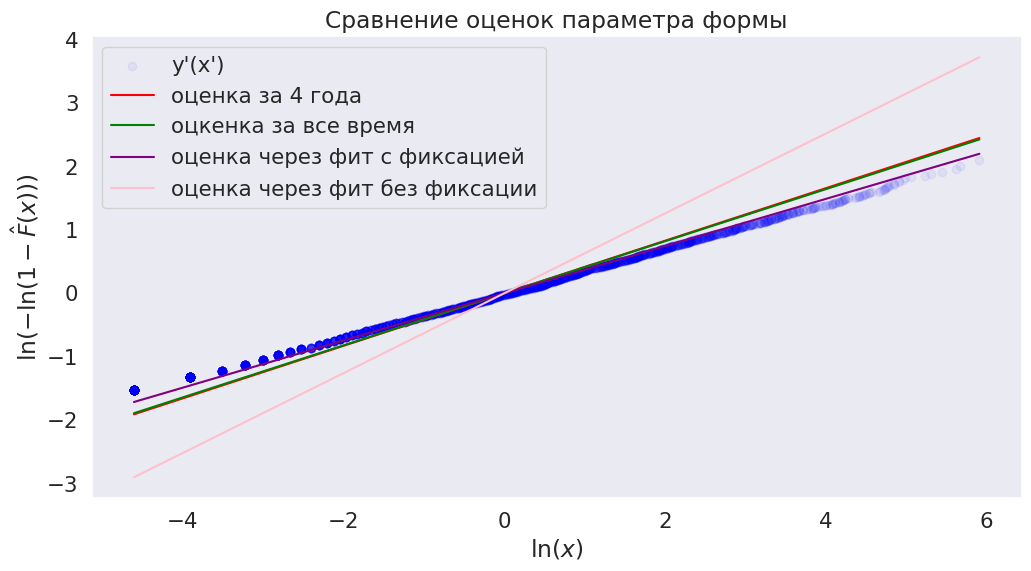

In [157]:
plt.figure(figsize=(12, 6))
plt.scatter(x_new2, y_new2, color='blue', alpha=0.05, label="y'(x')")
x_line = np.linspace(x_new2.min(), x_new2.max(), 100)
plt.plot(x_line, gamma_optimal_4_years * x_line, color='red', label="оценка за 4 года")
plt.plot(x_line, gamma_optimal_full_sample * x_line, color='green', label='оцкенка за все время')
plt.plot(x_line, gamma_estimate_scipy_1 * x_line, color='purple', label='оценка через фит с фиксацией')
plt.plot(x_line, gamma_estimate_scipy_2 * x_line, color='pink', label='оценка через фит без фиксации')

plt.xlabel("$\ln(x)$")
plt.ylabel(r"$\ln(-\ln(1 - \hat{F}(x)))$")
plt.title("Сравнение оценок параметра формы")
plt.legend()
plt.grid()
plt.show()

на этом графике видно, что оценка через фит с фиксацией на нуле очень похожа на действительное распределение точек y'(x')

**Вывод**

я получил, что самый выгодный способ для модификации распределения - убрать все нули, чем заменить их на что-то маленькое. также лучшей оценкой оказалась оценка через встроенную функцию фит с фиксацией на нуле,хотя найденные эмпирические оценки за 4 года и за всё время тоже очень похожи на наше распределение

## Задача 3

Хорошим методом получения аналитических оценок является метод моментов.

1. Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**, см. [Википедию](https://en.wikipedia.org/wiki/Gamma_distribution)), $\theta = 3$ для всех распределений $(N = 1000).$ Посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Промоделируйте полученные оценки для разных размеров выборки $n < N$ и изучите их скорости сходимости. На графике отразите истинный параметр. Можете построить отдельный график модуля/квадрата разности оценки и параметра (риск) для какой-то выборке и посмотреть, как быстро риск сходится к нулю.

сразу просто сгенерируем выборки

In [158]:
theta = 3

N, n = 1000, 1000

norm_samples = sps.norm.rvs(loc=0, scale=np.sqrt(theta), size=(N, n))
uniform_samples = sps.uniform.rvs(loc=0, scale=theta, size=(N, n))
gamma_samples = sps.gamma.rvs(a=1, scale=theta, size=(N, n))

нв семинаре нашли оценки методом моментом для этих распределений. получилось для $N(0, θ) → \hat{θ} = \overline{(X^2)}$, для $U(0. θ) → \hat{θ} = 2\overline{X}; Г(1, θ) → \hat{θ} = \overline{X}$

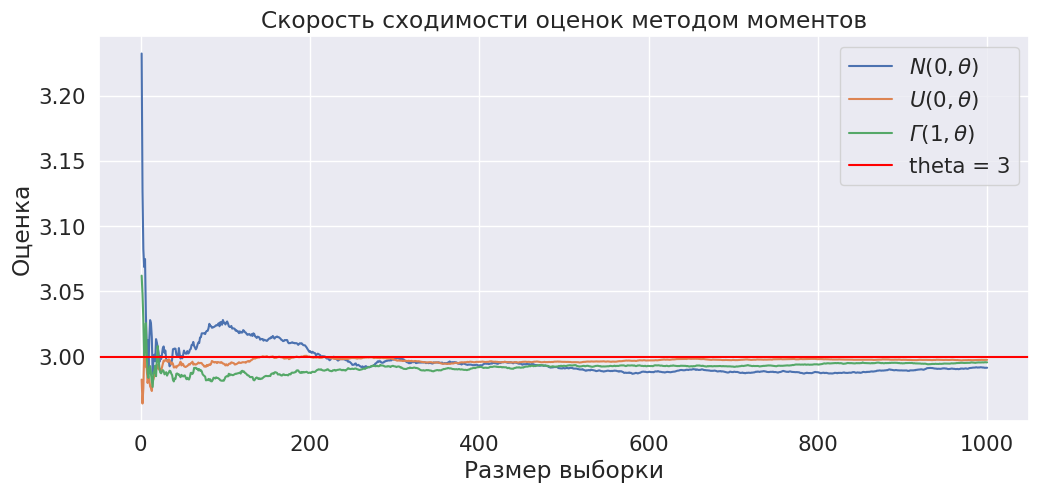

In [159]:
def cummean(arr):
    return np.cumsum(arr, axis=-1) / np.arange(1, arr.shape[-1] + 1)

def norm_estimation(data):
    return cummean(data ** 2)

def uniform_estimation(data):
    return 2 * cummean(data)

def gamma_estimation(data):
    return cummean(data)

epochs = np.arange(n) + 1

plt.figure(figsize=(12, 5))
plt.plot(epochs, norm_estimation(norm_samples).mean(axis=0), label=r'$N(0, \theta)$')
plt.plot(epochs, uniform_estimation(uniform_samples).mean(axis=0), label=r'$U(0, \theta)$')
plt.plot(epochs, gamma_estimation(gamma_samples).mean(axis=0), label=r'$Г(1, \theta)$')
plt.axhline(y=theta, color='red', label=f'theta = {theta}')

plt.title('Скорость сходимости оценок методом моментов')
plt.xlabel('Размер выборки')
plt.ylabel('Оценка')
plt.legend()
plt.show()


видим, что все оценки сходятся к параметру тета. Визуально быстрее всех это делает оценка для равномерного распределения, а вот для остальных двух распределений оценки имеюи достаточно большой разброс от истинного значения при маленькой выборке, хотя быстро возвращаются в колею и находятся около трех

Решение (вывод метода моментов для каждого случая):

In [160]:
interval = 100
norm_differences = np.abs(norm_estimation(norm_samples) - theta)[::interval]
uniform_differences = np.abs(uniform_estimation(uniform_samples) - theta)[::interval]
gamma_differences = np.abs(gamma_estimation(gamma_samples) - theta)[::interval]
print("Модуль разности каждые 50 шагов:")
print("N(0, θ):", norm_differences)
print("U(0, θ):", uniform_differences)
print("Γ(1, θ):", gamma_differences)

Модуль разности каждые 50 шагов:
N(0, θ): [[2.97691417e+00 1.72459853e+00 1.22143120e+00 ... 8.43568080e-02
  8.53353232e-02 8.52808585e-02]
 [1.44967749e+00 1.93789052e+00 6.40736697e-01 ... 6.24058346e-03
  6.09352811e-03 3.32213275e-03]
 [1.43215580e+00 1.53397363e+00 3.36163478e+00 ... 5.27949370e-02
  5.20621317e-02 5.36423269e-02]
 ...
 [1.44840536e+00 2.22414377e+00 1.94415792e+00 ... 1.49812655e-01
  1.49695984e-01 1.52516085e-01]
 [1.70417487e+00 4.55205538e-01 1.12976327e+00 ... 6.84044050e-03
  6.26748135e-03 1.10019229e-02]
 [2.68158162e+00 3.02206358e+00 2.02652366e+00 ... 3.02460102e-02
  2.93697909e-02 2.99667131e-02]]
U(0, θ): [[1.8053658  1.04664077 1.1277653  ... 0.04317    0.04175796 0.04073726]
 [1.2433069  0.95180577 0.09484461 ... 0.10515907 0.10272985 0.10298916]
 [0.27316181 0.80658099 1.32757538 ... 0.1280005  0.12594292 0.12479926]
 ...
 [1.63457344 1.74241791 1.61975969 ... 0.05232392 0.0538266  0.05607234]
 [2.88420301 2.419226   2.02363293 ... 0.02327763 0.

как и предполагалось, значения оценок в самом начале далековаты от 3, но к концу выборки модуль разности оценки и параметра тета становится очень мал для всех ценок (порядка 2*10^-2)

2. Есть два замечательных распределения, которые игнорировать никак нельзя. Первое --- $Pareto(k)$ с плотностью $p(x) = kx^{-k-1} I( x \ge 1)$, где $k > 0$. Второе --- $Cauchy(0, \theta)$  с плотностью $p(x) = \frac{\theta}{x^2 + \theta^2}$. Запишите оценки методом моментов для них и проверьте их на состоятельность на практике. Для моделирования возьмите то же значение параметра, что дано выше.

*Подсказка:* внимательно изучите, чему равны моменты каждого из распределений и при каких условиях. Можно ли гарантировать состоятельность полученных оценок каким-то теоретическими фактами?

Решение (аналитический вывод оценок):

И эту задачу мы решали на семинаре (спасибо г-ну Аброскину!). Получили, что для распределения  Парето с пробной функцией g(x) = ln(x). Тогда $\hat{k} = \frac{1}{\overline{ln(X)}}$. Для распределения Коши тоже используем обобщённый метод моментов, где в качестве пробных функций мы берем не степенные функции, а что-то необычное. В качество пробной функции возьмем $g(x) = \frac{1}{1+x^2}$. Тогда посчитав матож E(g(x)) получим оценку для theta: $\hat{\theta} = \frac{1}{\overline{\frac{1}{1 + X^2}}} - 1$

по $\href{https://tvims.nsu.ru/chernova/ms/lec/node13.html}{Теореме} $, оценка, полученная методом моментов, будет состоятельной, если она является непрерывной функцией от пробной функции. Поэтому обе наши оценки должны быть состоятельные

Моделирование:

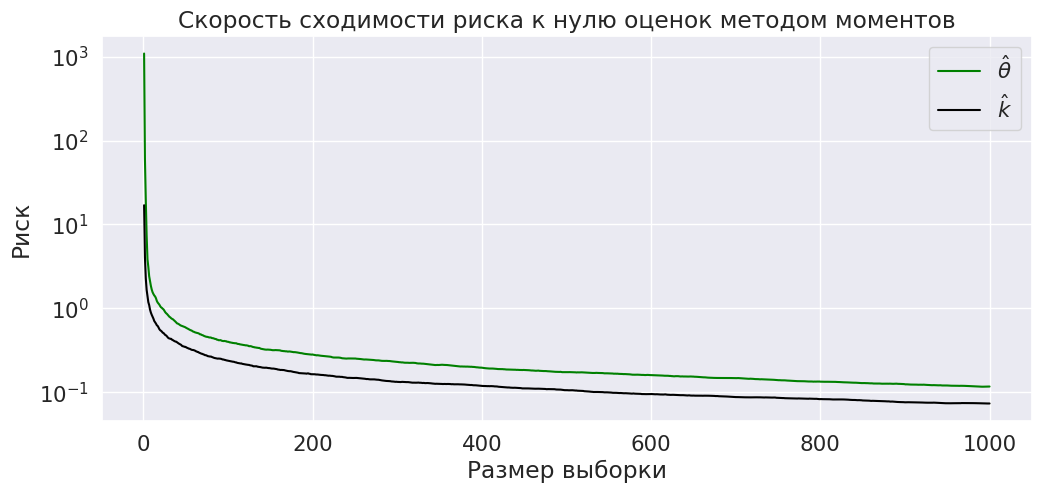

In [161]:
def theta_hat(data):
    return 1 / cummean(1 / (1 + data**2)) - 1

def k_hat(data):
    return 1 / cummean(np.log(data))

def risk(estimations, true_value):
    return np.abs(estimations - true_value).mean(axis=0)
pareto_samples = sps.pareto.rvs(theta, size=(N, n))
cauchy_samples = sps.cauchy.rvs(loc=0, scale=theta, size=(N, n))
plt.figure(figsize=(12, 5))


theta_hat = theta_hat(cauchy_samples)
k_hat = k_hat(pareto_samples)

cauchy_risks = risk(theta_hat, theta)
pareto_risks = risk(k_hat, theta)

plt.plot(range(1, n + 1), cauchy_risks, color = 'green', label=r'$\hat{\theta}$')
plt.plot(range(1, n + 1), pareto_risks, color = 'black', label=r'$\hat{k}$')

plt.yscale('log')
plt.xlabel('Размер выборки')
plt.ylabel('Риск')
plt.title('Скорость сходимости риска к нулю оценок методом моментов')
plt.legend()
plt.show()

эмпирические оценки являются состоятельными, ведь их риск стремится к нулю при увеличеснии размера выборки

**Вывод:**

методом моментов мы нашли оценки, которые на практике оказались состоятельными. Поэтому можно сделать вывод о том, что метод моментов - отличный инструмент для построения оценок

**Следующие две задачи посвящены тому, как получать более информативные оценки, чем точечные. Нам приходится обращаться к ним, так как свойства точечных оценок являются предельными, и мы мало что знаем о том, насколько конкретное значение оценки близко к истинному значению параметра. В условиях кровавой войны информация должна быть максимальной.**

### Задача 4. Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка) и какой-то отрезок, в который параметр попадёт с высокой вероятностью (такой отрезок называется **доверительным интервалом**_. На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Вспомним, как работает **метод подстановки** для получения оценок. В нём мы выражаем параметр при помощи распределения (как среднее или медиана, например), потом меняем распределение на эмпирическое и выражаем параметр уже через него. Бутстреп это подмена истинного распределения на эмпирическое.



1. Для каждого распределения из задачи 3 (в том числе из пункта 2) сгенерируйте выборку размера $N = 1000$. Далее замените Ваше распределение на равномерное распределение по построенной выборке (по теореме Гливенко-Кантелли эти распределения достаточно близки), и из эмпирического (равномерного) распределения постройте 100 выборок. Опишите, как Вы будете это делать.

*Указание:* из истинного распределения (нормального и т.д.) новые данные генерировать **нельзя**. Бутстреп это способ получения псевдо-новых данных из уже имеющихся.

Ответ: мы будем брать m подвыборок размера n из исходного распределения. брать мы их будем случайным образом. таким образом у нас будет двумерный массив  (m, n) подвыборок из эмпирического распределения, по каждой из которых можем рассчитать оценку парамеетра на ней.

In [162]:
N, n, m = 1000, 750, 100
def generator(true_sample):
  subsample_indices = np.random.choice(N, size=(n,))
  subsample = true_sample[subsample_indices]
  return subsample
true_samples = [
    sps.norm.rvs(loc=0, scale=np.sqrt(theta), size=(N,)),
    sps.uniform.rvs(loc=0, scale=theta, size=(N,)),
    sps.gamma.rvs(a=1, scale=theta, size=(N,)),
    sps.pareto.rvs(theta, size=(N,)),
    sps.cauchy.rvs(loc=0, scale=theta, size=(N,))
]

samples = []
for true_sample in true_samples:
    samples.append(generator(true_sample))

print([x.shape for x in samples])

[(750,), (750,), (750,), (750,), (750,)]


2. Для каждой псевдо-выборки из предыдущего пункта постройте оценку методом моментов из задачи 3: получится выборка оценок (как в домашке 1). По ней посчитайте эмпирическую (выборочную) дисперсию оценок и сделайте вывод о том, как связано значение дисперсии оценки (эмпирической и бутстрепной) с точностью и скоростью сходимости оценки к параметру.

напомню реализации функций для оценок, полученных методом моментов

In [163]:
def cummean(arr):
    return np.cumsum(arr, axis=-1) / np.arange(1, arr.shape[-1] + 1)

def norm_estimation(data):
    return cummean(data ** 2)

def uniform_estimation(data):
    return 2 * cummean(data)

def gamma_estimation(data):
    return cummean(data)

def theta_hat(data):
    return 1 / cummean(1 / (1 + data**2)) - 1

def k_hat(data):
    return 1 / cummean(np.log(data))

In [164]:
for (i, estimation_f) in enumerate([norm_estimation, uniform_estimation, gamma_estimation, k_hat, theta_hat]):
  var = estimation_f(samples[i]).var(axis = 0)
  print(var)

0.07687227277995354
0.04234986059055345
0.04705974902363676
2.3198031118272664
11192.937809654231


моим фаворитом в прошлой задаче была оценка для равномерного распределения. сейчас ее дисперсия крайне мала - 0.08. минимальная среди всех. остальные оценки кроме оценки для Коши тоже имеют маленькие дисперсии. это хорошо
с кошм возникли проблемы, потому что это распределение не имеет конечного матожидания

3. Как мы знаем, оценка методом моментов не гарантирует несмещённости. При помощи метода бутстрапирования найдите смещение (разницу между мат. ожиданием оценки и значением параметра) каждой оценки. Какие оценки (в теории) несмещённые?

для исследования эмпирических оценок на смещенность/несмещенность для начала заведем словарь для хранения данных вида "имя распределения"-"её реальный матож"

тут мы сталкиваемся с проблемой, что распределение коши не имеет конечного матожидания. поэтому я решил сравнить отклонение просто от параметра тета

In [165]:
true_means = {
    'N': (0, np.sqrt(theta)),
    'U': (theta / 2,),
    'Г': (theta,),
    'pareto': (theta / (theta - 1),)
}

for index, (name, estimation_f, true_value) in enumerate(zip(
        ['N', 'U', 'Г', 'pareto'],
        [norm_estimation, uniform_estimation, gamma_estimation, k_hat, theta_hat],
        true_means.values())):
    samples = np.array(samples)
    mean = samples.mean(axis=0)
    if true_value[0] is not None:
        bias = mean - true_value[0]
        print('Смещение для', name, ' : ',  bias.mean())
print("смещение для оценки коши относительно теты: ",np.mean(samples[4])-theta)

Смещение для N  :  0.5607305955397068
Смещение для U  :  -0.9392694044602932
Смещение для Г  :  -2.439269404460293
Смещение для pareto  :  -0.9392694044602932
смещение для оценки коши относительно теты:  -5.975723062210159


**Вывод:**

из результатов последней ячейки можно однозначно сказать, что оценки для равномерного, нормального и распределения парето будут несмещенными, т.к. смещение очень близко к нулю. на семинаре мы показали, что первые три оценки должны быть несмещенными, но в нашем эксперименте такого не вышло для гамма-распределения. предположу, что связано это с тем, что при бутстрапировании мы могли раздуть какие-то не слишком значимые для нас значения выборок и, например, не учесть какие-то значимые. думаю, если бы мы увеличили все параметры N,n,m в несколько раз, то получили бы заветные сходимости

### Задача 5. Байес.

**Эта задача является бонусной и стоит 30 (!!!) баллов**

Байесовское оценивание даёт ультиматимативный способ построения оценок без какой-либо потери в информации. Теперь мы оцениваем параметры распределения не точками и не отрезками, а распределениями!

1. Будем смотреть на параметрическое семейство распределений как на условное распределение: $P_{\theta} = P(X | \theta)$. В байесовском подходе подразумевается, что параметр $\theta$ сам приходит из некоторого **априорного** распределения (которое статист либо предпологает сам, либо предпологает исходя из внешних знаний об области).

Вспомним теорему Байеса: $p(\theta | X) = \frac{p(X | \theta) p(\theta)}{p(X)}$, где знаменатель $p(x)$ получается как интеграл по $\theta$ от числителя. В зависимости от того, можем ли мы взять этот интеграл, выбирается тип байесовской оценки. $p(X | \theta)$ мы знаем, это хорошо нам знакомое правдоподобие, $p(\theta)$ называется априорным распределением (prior) параметра, мы его выбираем сами исходя из наших предпочтений, $p(X)$ от параметра не зависит и называется обоснованностью (evidence), и показывает, насколько правдоподобна выборка в терминах выбранного семейства распределений.

Скачайте датасет сердечных заболеваний: https://colab.research.google.com/drive/1J5ujdgEDwLhie13d4XDd3manrNe_c3Ek#scrollTo=vd8WgXL3jjzL

In [166]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'chol', 'fbs','num']
data = pd.read_csv(url, names=columns)

data = data.replace('?', pd.NA)
data = data.dropna()

data = data.astype(float)

features = data[['age', 'sex', 'fbs', 'chol']]
target = data['num']
print(features.head())
print(target.head())


                                            age  sex  fbs  chol
63.0 1.0 1.0 145.0 233.0 1.0 2.0 150.0 0.0  2.3  3.0  6.0   0.0
67.0 1.0 4.0 160.0 286.0 0.0 2.0 108.0 1.0  1.5  2.0  3.0   3.0
             120.0 229.0 0.0 2.0 129.0 1.0  2.6  2.0  7.0   2.0
37.0 1.0 3.0 130.0 250.0 0.0 0.0 187.0 0.0  3.5  3.0  3.0   0.0
41.0 0.0 2.0 130.0 204.0 0.0 2.0 172.0 0.0  1.4  1.0  3.0   0.0
63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0    0.0
67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0    2.0
                120.0  229.0  0.0  2.0  129.0  1.0    1.0
37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0    0.0
41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0    0.0
Name: num, dtype: float64


Мы будем предсказывать наличие и степень выраженности болезни (переменная num) это наличие, используя следующие параметры: age, sex, fbs, chol

Переменная num имеет категориальное распределение. Напишите его плотность и докажите, что сопряжённым к нему будет распределение Дирихле https://en.wikipedia.org/wiki/Dirichlet_distribution.

Доказательство:

Пока что мы работаем в модели, которая не учитывает никаких параметров и рассматриваем весь датасет как единую выборку индикаторов степени выраженности болезни (num).

2. "Байес для бедных" (Poor man's bayes)

Пусть интеграл в знаменателе мы считать не умеем и мы готовы с этим смириться. Что в таком случае делать? Можно искать моду (максимум) апостериорной плотности $P(\theta | X)$, где $X$ --- выборка, и рассматривать оценку $\theta$ как точку максимума.

Подберите три различных априорных распределения на параметр (т.е. три разных набора параметров априорного распределения Дирихле) и найдите максимум апостериорной плотности.
Преобразуйте задачу максимизации и найдите максимум по сетке или оптимизатором.

Сделайте вывод о том, как влияет априорная информация о параметре на оценку? Вспомните лекции из курса машинного обучения. На какой объект похоже априорное распределение? Как его следует выбирать. Как связаны максимум апостериорной плотности и оценка максимального правоподобия?

Ответ:

Вы --- врач и оценка вероятности $\mathsf P(num=0)$ оказывается больше, чем 0.3, то Вы отправите пациента на доп. обследование и возможно на лечение. Как лучше подобрать априорное распределение, чтобы оценке байеса для бедных можно было доверять. Почему вообще одни априорные параметры могут быть лучше других?

Ответ:

Подберите такой порог $P(num = 0)$ при котором пациент отправляется на доп. обследование и два таких набора априорных параметров, при которых для данной выборки порог достигается и не достигается.

Сделайте вывод о выборе априорного распределения.

3. Байес для богатых (обычный байес).

Отказываться считать интеграл нельзя, за это полагается смертная казнь.

Посчитайте и визуализируйте апостериорные плотности для разных априорных параметров. Если плотность оказывается слишком похожа на дельта-функцию, считайте её не для всей выборки

Что Вы бы брали точечной оценкой параметра исходя из апостериорного распределения? Почему?

4. Выбор модели.

Рассмотрим несколько моделей предсказания сердечных заболеваний. Модели будут очень простыми --- у нас будет разный параметр вероятности для разных групп пациентов. Предложите 4-5 разбиений пациентов на группы (по полу/возрасту/каким-то порогам на количество сахара или холестерина в крови) и рассмотрите модели, при которых параметры категориального распределения оказываются разными или одинаковыми для разных групп. Посмотрите на пример с семинара. Посчитайте обоснованность в каждом случае.

**Указание:** не считайте интеграл, так как обоснованностью будет произведение комбинаторных коэффициентов и бета-функций.

**Указание:** При сравнении обоснованности для модели, которая учитывает разбиение на группы с той, которая не учитывает, плотность всё равно следует факторизовать на группы, чтобы анализ был одинаковым.

Например, для сравнения модели "параметр зависит от возраста" и "параметр зависит от пола" необходимо разделить данные на 4 группы "молодые/старые мужчины/женщины". См. пример с семинара.

Предполагая возможнность модели "параметр зависит от пола" мы делаем неявное предположение, что данные для разных полов приходят из разных совокупностей, а значит их нельзя объединять в одну выборку. Осторожно формулируйте, в каких предположениях Вы сравниваете модели.

У какой модели выше обоснованность? Почему?

Сделайте вывод о байесовском оценивании: